In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Data Exploration**

*step1*


*--Finding out categorical & Numerical columns,& finding out null values*

In [2]:
path=r"C:\Users\tanma\DATASCIENCE\Machinelearning\Interncarrier _assignment\train.csv"
data=pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*categorical column*

In [5]:
data.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

*Numerical columns*

In [6]:
data.select_dtypes(exclude='object').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

*Finding out Null values*

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Fill missing value*

In [8]:
data=data.fillna(method='bfill')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [10]:
ids=data['PassengerId']
ids

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [11]:
cols=['PassengerId','Cabin']
data1=data.drop(cols,axis=1)
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Data Cleaning & Preprocessing**

*OUTLIER ANALYSIS*

In [12]:
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)

IQR=Q3-Q1

lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=data['Fare']<lb
c2=data['Fare']>ub
con=c1|c2
outlier_data=data[con]
outlier_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,66.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,D33,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,35.0,8,2,CA. 2343,69.5500,C92,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,4.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,E17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,A24,S


*Finding out non_outliers*


In [13]:
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)

IQR=Q3-Q1

lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=data['Fare']<lb
c2=data['Fare']>ub
con=c1&c2
non_outlier_data=data[con]
non_outlier_data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


*Histogram*

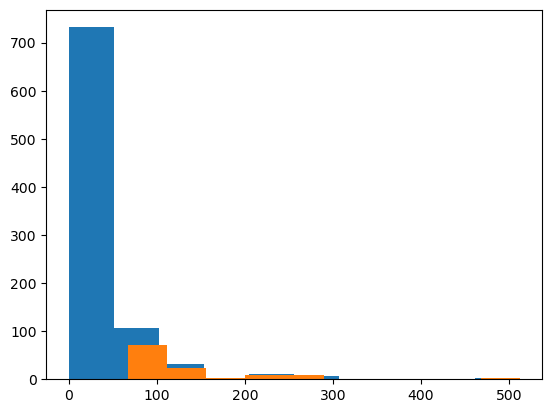

In [14]:
plt.hist(data['Fare'])
plt.hist(outlier_data['Fare'])
plt.show()

*categorical To Numerical*

In [15]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols[1:]
for i in cat_cols[1:]:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    for i in data:
        data[i]=le.fit_transform(data[i])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,81,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,55,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,129,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,30,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,34,1,2,675,131,60,2
889,889,1,0,81,1,34,0,0,8,153,60,0


**Feature selection**

In [16]:
x=data.drop('Survived',axis=1)
y=data['Survived']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.25,
                                               random_state=42)


**Developing Model**

*Logistic Regression*

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

**Hypertunning Model**

In [18]:
from sklearn.model_selection import GridSearchCV,cross_val_score
log_params=[keys for keys in log_reg.get_params()]

param_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['11','l2'],
    'max_iter':[100,200,300]
     }


In [19]:
grid_search=GridSearchCV(log_reg,
                        param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=True)

grid_search.fit(x_train,y_train)


best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params :",best_params)
print("best train accuracy :",best_score)

data

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best params : {'C': 100, 'max_iter': 300, 'penalty': 'l2'}
best train accuracy : 0.7934238581528448


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,81,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,55,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,129,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,30,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,34,1,2,675,131,60,2
889,889,1,0,81,1,34,0,0,8,153,60,0


**Test Data**

In [20]:
path=r"C:\Users\tanma\DATASCIENCE\Machinelearning\Interncarrier _assignment\test.csv"
test_data=pd.read_csv(path)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
#col=['PassengerId','Cabin']
#test_data=test_data.drop(col,axis=1)
#test_data

In [22]:
cat_cols=test_data.select_dtypes(include='object')
cat_cols[1:]
for i in cat_cols[1:]:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    for i in test_data:
        test_data[i]=le.fit_transform(test_data[i])
    
test_data
    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,206,1,44,0,0,152,24,76,1
1,1,2,403,0,60,1,0,221,5,76,2
2,2,1,269,1,74,0,0,73,41,76,1
3,3,2,408,1,34,0,0,147,34,76,2
4,4,2,178,0,27,1,1,138,46,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,413,2,353,1,79,0,0,267,31,76,2
414,414,0,283,0,51,0,0,324,154,22,0
415,415,2,332,1,50,0,0,346,9,76,2
416,416,2,384,1,79,0,0,220,31,76,2


**Model Prediction**

In [23]:
y_pred_log=log_reg.predict(test_data)

In [24]:
titanic_test_data=pd.DataFrame(zip(ids,y_pred_log),
                              columns=['PassengerId','Survived'])



In [25]:
d={'N':0,'Y':1}
titanic_test_data['Survived']=titanic_test_data['Survived'].map(d)
titanic_test_data

,PassengerId,Survived
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
413,414,NaN
414,415,NaN
415,416,NaN
416,417,NaN


In [26]:
titanic_test_data.to_csv('titanic_test.csv',index=False)